**Na co bacha**

- Žánry jsou spojeny s interprety, ne písněmi!

In [113]:
import os
import pandas as pd

In [114]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))
wikid = pd.read_json(os.path.join("wikidata","wikidata.json"))
df = df.merge(wikid, on="interpret_hlavni", how="outer")

In [115]:
zanry = df.explode('zanry')

In [116]:
import json

In [117]:
def ze_slovniku(slovnik, druhysloupec):
    with open(os.path.join("data_rucni",slovnik), 'r', encoding='utf-8') as file:
        frejm = pd.DataFrame(json.load(file), index=[0]).transpose().reset_index()
        frejm = frejm.rename(columns = { "index" : "zanry", 0 : druhysloupec})
    return frejm

In [118]:
zanry_kratce = ze_slovniku('zanry_klasik.json','zanry_kratce')

In [119]:
zanry_prvky = ze_slovniku('zanry_prvky.json','zanry_prvky')

In [120]:
zanry = zanry.merge(zanry_kratce, on='zanry', how="outer")
zanry = zanry.merge(zanry_prvky, on='zanry', how="outer")

## Nejzastoupenější žánry

In [121]:
zanry.groupby('zanry').size().nlargest(20)

zanry
pop music                     31218
pop rock                      14811
hip hop                       11260
contemporary R&B              10171
alternativní rock              9962
rock                           9790
elektropop                     9230
dance-pop                      7431
elektronická taneční hudba     7011
synthpop                       5905
taneční hudba                  5627
house music                    5357
electro house                  5296
rhythm and blues               4080
progressive house              3974
soul                           3721
indie pop                      3424
elektronická hudba             3171
reggae                         2906
deep house                     2830
dtype: int64

In [122]:
# zanry.groupby('zanry').size().sort_values(ascending=False).to_json(os.path.join("data_raw","zanry_pro_anet.json"), indent = 4, force_ascii=False)

## Zastoupenost jednotlivých žánrů v čase: varianta "obsahuje"

In [123]:
def podil(z,p):
    z = z.lower()
    if isinstance(z, str):
        vyvoj = zanry[(zanry['zanry'].str.lower().str.contains(z,na=False)) & (zanry['pozice'] <= p)].groupby('rok').size() / df[df['pozice'] <= p].groupby('rok').size()
        vyvoj.plot.bar()
    if isinstance(z, list):
        vyvoj = "Toto zatím neumím."
    
    return (vyvoj)

Funkce vybírá všechny řádky obsahující řetězec ("pop" vrátí i "pop rock") a podělí je počtem písniček za daný rok. Druhý parametr filtruje pozice v žebříčku.

rok
2006.0    0.949608
2007.0    0.989804
2008.0    0.726923
2009.0    0.564706
2010.0    0.455000
2011.0    0.453200
2012.0    0.551373
2013.0    0.573725
2014.0    0.632600
2015.0    0.501154
2016.0    0.391765
2017.0    0.512115
2018.0    0.471400
2019.0    0.422941
2020.0    0.293137
2021.0    0.333137
2022.0    0.495294
2023.0    0.476842
dtype: float64

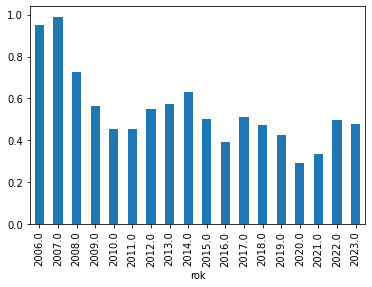

In [124]:
podil('rock',100)

rok
2006.0    0.145882
2007.0    0.139020
2008.0    0.185769
2009.0    0.270588
2010.0    0.305000
2011.0    0.316600
2012.0    0.225490
2013.0    0.244118
2014.0    0.191400
2015.0    0.136923
2016.0    0.120392
2017.0    0.130000
2018.0    0.110000
2019.0    0.068431
2020.0    0.057647
2021.0    0.080392
2022.0    0.068431
2023.0    0.089737
dtype: float64

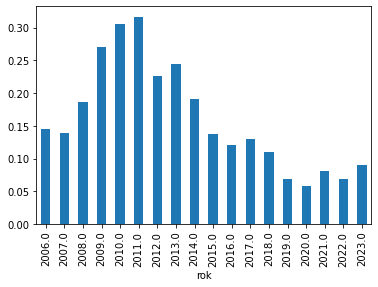

In [125]:
podil('hip hop',100)

rok
2006.0    0.097451
2007.0    0.104510
2008.0    0.115769
2009.0    0.148235
2010.0    0.155769
2011.0    0.159400
2012.0    0.130588
2013.0    0.099804
2014.0    0.083800
2015.0    0.081154
2016.0    0.093137
2017.0    0.103654
2018.0    0.092200
2019.0    0.054510
2020.0    0.027255
2021.0    0.035686
2022.0    0.052549
2023.0    0.050000
dtype: float64

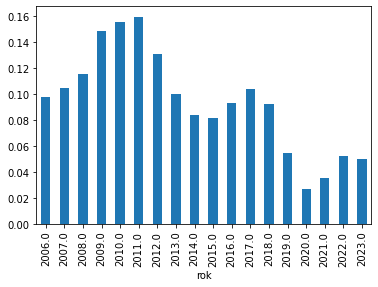

In [126]:
podil('rap',100)

rok
2006.0    0.043333
2007.0    0.077843
2008.0    0.071538
2009.0    0.106471
2010.0    0.190192
2011.0    0.279200
2012.0    0.245490
2013.0    0.248627
2014.0    0.335200
2015.0    0.440962
2016.0    0.433529
2017.0    0.415000
2018.0    0.294400
2019.0    0.360784
2020.0    0.331176
2021.0    0.237843
2022.0    0.303725
2023.0    0.179474
dtype: float64

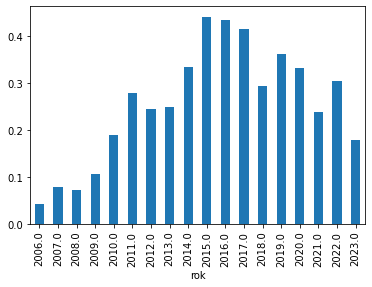

In [127]:
podil('house',100)

rok
2006.0         NaN
2007.0    0.000392
2008.0         NaN
2009.0    0.002745
2010.0    0.006154
2011.0    0.002600
2012.0    0.001373
2013.0    0.000980
2014.0    0.001800
2015.0    0.000192
2016.0    0.000588
2017.0    0.000769
2018.0         NaN
2019.0    0.002353
2020.0         NaN
2021.0         NaN
2022.0         NaN
2023.0         NaN
dtype: float64

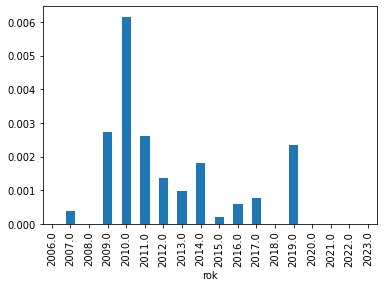

In [128]:
podil('swing',100)

rok
2006.0    0.167647
2007.0    0.189216
2008.0    0.168269
2009.0    0.155490
2010.0    0.167885
2011.0    0.136200
2012.0    0.126863
2013.0    0.118431
2014.0    0.100600
2015.0    0.111346
2016.0    0.133725
2017.0    0.080962
2018.0    0.113000
2019.0    0.067059
2020.0    0.102549
2021.0    0.099216
2022.0    0.056471
2023.0    0.051053
dtype: float64

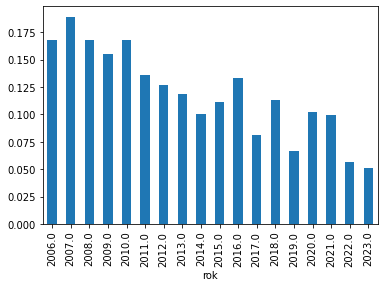

In [129]:
podil('R&B',100)

rok
2006.0    0.037255
2007.0    0.052353
2008.0    0.067885
2009.0    0.047647
2010.0    0.053846
2011.0    0.073400
2012.0    0.095294
2013.0    0.096078
2014.0    0.072400
2015.0    0.079038
2016.0    0.082941
2017.0    0.055192
2018.0    0.030800
2019.0    0.028824
2020.0    0.045490
2021.0    0.026275
2022.0    0.056863
2023.0    0.040526
dtype: float64

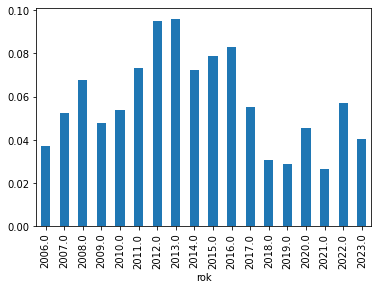

In [130]:
podil('soul',100)

## Zastoupenost jednotlivých žánrů v čase: varianta "rovná se"

In [131]:
zanry['zanry_kratce'].drop_duplicates().to_list()

['pop',
 'elektronická taneční hudba',
 'elektronická hudba',
 'rock',
 'soul a R&B',
 'jazz',
 'folk a country',
 'latinskoamerická hudba',
 nan,
 'jamajská hudba',
 'hip hop a rap',
 'různé',
 'blues',
 'alternativní metal',
 'metal',
 'indie rock',
 'indie pop',
 'disco',
 'mluvené slovo',
 'alternativní hudba',
 'klasická hudba',
 'šanson',
 'filmová hudba']

In [132]:
def podil_kratce(z,p):
    z = z.lower()
    if isinstance(z, str):
        vyvoj = zanry[(zanry['zanry_kratce'] == z) & (zanry['pozice'] <= p)].drop_duplicates(subset=['interpret_hlavni','track']).groupby('rok').size() / df[df['pozice'] <= p].drop_duplicates(subset=['interpret_hlavni','track']).groupby('rok').size()
        vyvoj.plot.bar()
    if isinstance(z, list):
        vyvoj = "Toto zatím neumím."
    
    return (vyvoj)

rok
2006.0    0.056150
2007.0    0.053942
2008.0    0.039301
2009.0    0.070866
2010.0    0.025210
2011.0    0.032922
2012.0    0.044355
2013.0    0.022556
2014.0    0.075099
2015.0    0.065041
2016.0    0.033058
2017.0    0.055762
2018.0    0.040541
2019.0    0.060606
2020.0    0.039370
2021.0    0.051502
2022.0    0.055556
2023.0    0.061350
dtype: float64

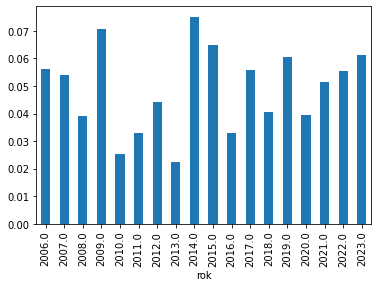

In [139]:
podil_kratce('folk a country', 100)

rok
2006.0    0.387701
2007.0    0.423237
2008.0    0.301310
2009.0    0.291339
2010.0    0.226891
2011.0    0.242798
2012.0    0.270161
2013.0    0.240602
2014.0    0.316206
2015.0    0.276423
2016.0    0.198347
2017.0    0.293680
2018.0    0.283784
2019.0    0.281385
2020.0    0.200787
2021.0    0.206009
2022.0    0.190476
2023.0    0.190184
dtype: float64

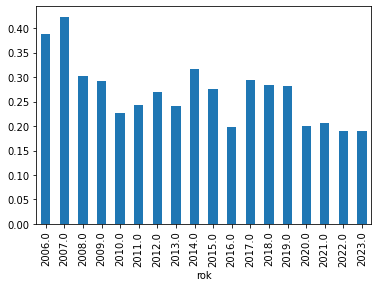

In [133]:
podil_kratce('rock', 100)

rok
2006.0    0.152406
2007.0    0.170124
2008.0    0.165939
2009.0    0.196850
2010.0    0.260504
2011.0    0.205761
2012.0    0.197581
2013.0    0.184211
2014.0    0.110672
2015.0    0.162602
2016.0    0.095041
2017.0    0.144981
2018.0    0.121622
2019.0    0.090909
2020.0    0.102362
2021.0    0.085837
2022.0    0.075397
2023.0    0.104294
dtype: float64

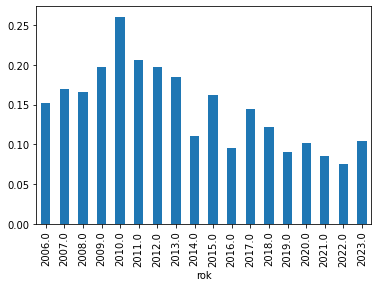

In [141]:
podil_kratce('hip hop a rap', 100)

rok
2006.0    0.371658
2007.0    0.365145
2008.0    0.414847
2009.0    0.444882
2010.0    0.436975
2011.0    0.436214
2012.0    0.447581
2013.0    0.417293
2014.0    0.403162
2015.0    0.434959
2016.0    0.446281
2017.0    0.438662
2018.0    0.369369
2019.0    0.406926
2020.0    0.346457
2021.0    0.377682
2022.0    0.297619
2023.0    0.337423
dtype: float64

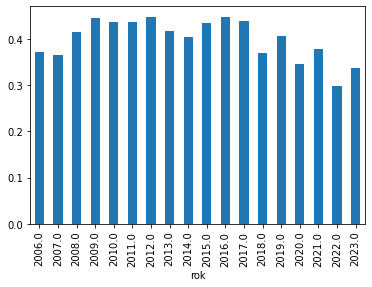

In [135]:
podil_kratce('pop', 100)

rok
2006.0    0.141711
2007.0    0.112033
2008.0    0.165939
2009.0    0.188976
2010.0    0.252101
2011.0    0.238683
2012.0    0.217742
2013.0    0.240602
2014.0    0.181818
2015.0    0.280488
2016.0    0.227273
2017.0    0.193309
2018.0    0.180180
2019.0    0.207792
2020.0    0.188976
2021.0    0.137339
2022.0    0.170635
2023.0    0.141104
dtype: float64

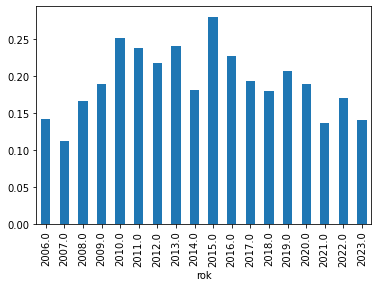

In [136]:
podil_kratce('elektronická taneční hudba', 100)

In [137]:
zanry[zanry['rok'] == 2023].groupby('zanry_kratce').size().nlargest()

zanry_kratce
pop                           2229
rock                          2023
elektronická taneční hudba    1138
folk a country                 564
hip hop a rap                  550
dtype: int64